<a href="https://colab.research.google.com/github/alejandrolq/StaticalLearningII-Practicas/blob/main/Practica2_Reduccion_Dimensionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: José Alejandro López Quel**

**Carné: 21001127**

**Statical Learning II**

**Sección U**

**Práctica 2**

## Importando librerías necesarias

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import svd
from tensorflow import keras
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Importando datos

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
## Tamaño de dataset de entrenamiento
train_images.shape

(60000, 28, 28)

In [ ]:
## Tamaño de dataset de prueba
test_images.shape

(10000, 28, 28)

In [ ]:
## Concatenando todas las imagenes y etiquetas
all_images = np.concatenate((train_images, test_images), axis = 0)
all_labels = np.concatenate((train_labels, test_labels), axis = 0)

In [ ]:
## Obteniendo el tamaño completo de datasets combinados
all_images.shape

(70000, 28, 28)

In [ ]:
## Obteniendo el tamaño completo de etiquetas
all_labels.shape

(70000,)

## Implementando función para normalizar los datos

In [ ]:
## Preprocesamiento de imagenes
## Funcion para obtener los vectores fila de cada imagen, así como escalar tengan una media de 0, y una desviación estándar de 1
def process_images(images):
  tensor = images.reshape(-1, 28 * 28)
  tensor = scale(tensor)
  return tensor

In [ ]:
scaled_images = process_images(all_images)
## Comprobando forma de los datos normalizados
scaled_images.shape

(70000, 784)

## Definición de PCA utilizando SVD y numpy

In [ ]:
class PCA_:
  def __init__(self, data, k):
    self.data = data
    self.k = k
    self.variance = 0
    self.principal_components = 0

  def SVD(self, return_U=False):
    cov_matrix = np.cov(self.data, rowvar = False)
    U, variance, _ = svd(cov_matrix)
    if return_U:
      return U
    else:
      return variance
      
  def var(self):
    variance = self.SVD()
    variance_pc = np.sum(variance[:self.k])/ np.sum(variance)
    return variance_pc

  def fit(self):
    U = self.SVD(return_U=True)
    self.variance = self.var()
    U_reduced = U[:, :self.k]
    self.principal_components = np.matmul(self.data, U_reduced)

In [ ]:
## Reduciendo el dataset a 2 dimensiones empleando la clase definida para PCA
PCA = PCA_(scaled_images, 2)

In [ ]:
PCA.fit()

In [ ]:
## Validando las dimensiones obtenidas
PCA.principal_components.shape

(70000, 2)

In [ ]:
## Mostrando los componentes principales
PCA.principal_components

array([[  0.82469513, -20.86260448],
       [-17.07338982,   4.96621704],
       [  9.60003596,  12.32192784],
       ...,
       [  6.99353047,   8.48864653],
       [  2.8922854 ,  15.3764669 ],
       [ 17.53224758,  -0.12483318]])

In [ ]:
## Mostrando cantidad de varianza preservada
PCA.variance

0.3649489691789435

## T-sne empleando sklearn 

In [ ]:
TSNE_model = TSNE(n_components=2, verbose = 1, n_jobs=100)

In [ ]:
TSNE_model.fit_transform(scaled_images)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 70000 samples in 21.077s...
[t-SNE] Computed neighbors for 70000 samples in 6122.165s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for

array([[-33.544506 ,  20.600477 ],
       [ 47.8281   ,   6.522748 ],
       [  6.579328 ,  21.450197 ],
       ...,
       [ -6.182725 ,   2.9427738],
       [  3.6041772,  51.727936 ],
       [-31.282484 ,  -8.143502 ]], dtype=float32)

In [ ]:
TSNE_model.embedding_

array([[-33.544506 ,  20.600477 ],
       [ 47.8281   ,   6.522748 ],
       [  6.579328 ,  21.450197 ],
       ...,
       [ -6.182725 ,   2.9427738],
       [  3.6041772,  51.727936 ],
       [-31.282484 ,  -8.143502 ]], dtype=float32)

In [ ]:
## Definiendo valores para visualización de gráficas
sns.set(rc={'figure.figsize':(12,10), })
sns.set_style("whitegrid")

## Visualización de resultados

In [ ]:
## Creando un diccionario con las etiquetas
label_dictionary = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [ ]:
## Agregando las etiquetas 
hue = list()
for i in all_labels:
    x = label_dictionary.get(i)
    hue.append(x)

### Visualización de PCA

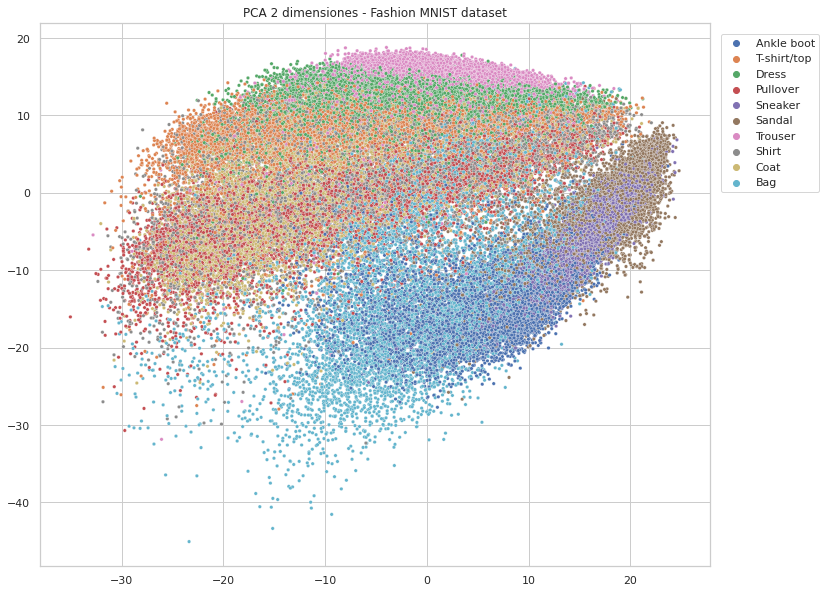

In [ ]:
sns.scatterplot(x = PCA.principal_components[:,0], y = PCA.principal_components[:,1], hue = hue, s = 12)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1.)
plt.title("PCA 2 dimensiones - Fashion MNIST dataset")
plt.show()

Para la reducción de dimensiones utilizando el algoritmo de PCA se observa que no hay una clasificación clara visualmente. Para este algoritmo se obtuvo que se logra mantener un total aproximado del 36.5% de toda la varianza de los datos. 

### Visualización de t-sne

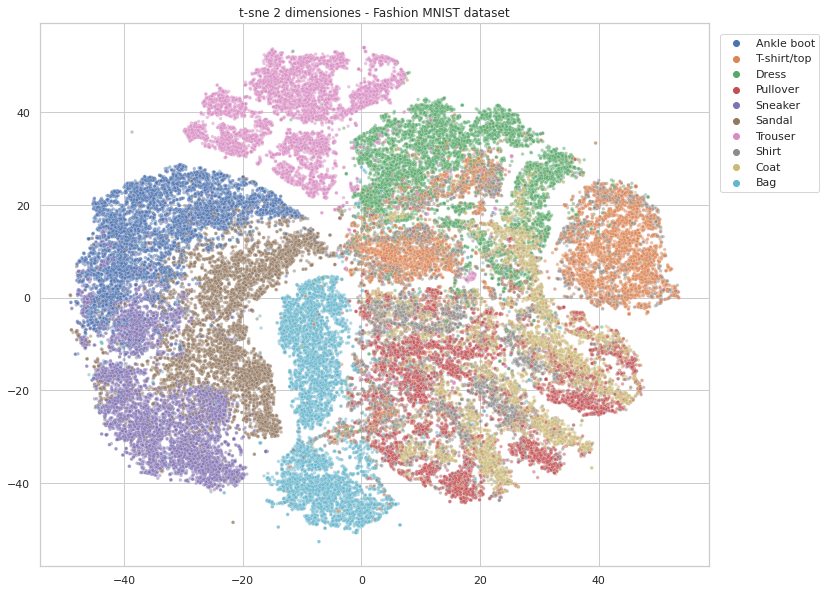

In [ ]:
sns.scatterplot(x = TSNE_model.embedding_[:,0], y = TSNE_model.embedding_[:,1], hue = hue, s = 12, alpha = 0.5)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1.)
plt.title("t-sne 2 dimensiones - Fashion MNIST dataset")
plt.show()

Se observa que el embedding generado por el algoritmo de t-SNE, agrupa las prendas que poseen características similares. Entre la clasificación se puede observar que existen distintos grupos, como se detalla a continuación:

- Del lado izquierdo se observa que se agrupan los distintos tipos de calzado, tales como: ankle boot, sneaker y sandal.
- Se observa tambien que existe un grupo conformado por prendas como shirt, pullover, coat, t-shirt/top y dress.
- Se tiene que existen tambien grupos que no tienen las mismas características que otras prendas, tal es el caso de bag y trouser.

## Aplicando clustering con sklearn sobre la representación reducida

In [ ]:
label_dictionary_kmeans = {0:"Grupo 0", 1: "Grupo 1", 2: "Grupo 2", 3: "Grupo 3", 4: "Grupo 4", 5: "Grupo 5", 6: "Grupo 6", 7: "Grupo 7", 8: "Grupo 8", 9: "Grupo 9"}

### Implementación de K-means utilizando PCA

In [ ]:
## Implementando Kmeans para realizar el clustering
PCA_kmeans = KMeans(n_clusters = 10)
PCA_kmeans.fit(PCA.principal_components)
PCA_kmeans.labels_

array([6, 9, 1, ..., 1, 5, 3], dtype=int32)

In [ ]:
## Agregando etiquetas a los clusters obtenidos de kmeans
hue_kmeans_pca = list()
for i in PCA_kmeans.labels_:
    x = label_dictionary_kmeans.get(i)
    hue_kmeans_pca.append(x)

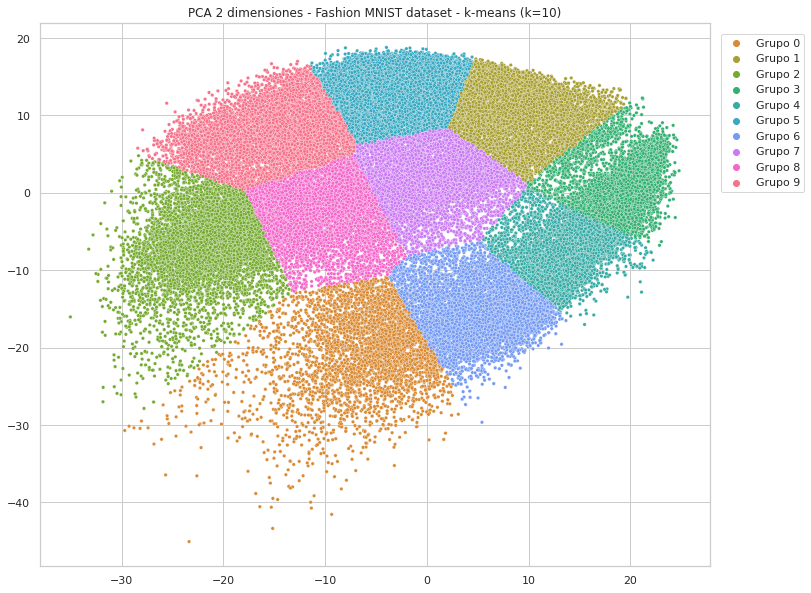

In [ ]:
sns.scatterplot(x = PCA.principal_components[:,0], y = PCA.principal_components[:,1], hue = hue_kmeans_pca, s = 12, hue_order=sorted(hue_kmeans))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1.)
plt.title("PCA 2 dimensiones - Fashion MNIST dataset - k-means (k=10)")
plt.show()

Al implementar este metodo, se observa que los clusters generados por el algoritmo de K-means en el embedding obtenido utilizando PCA, crea divisiones (grupos) fuertemente delimitados, lo cual no corresponde a los datos del dataset real. Se observa que los clusters formados no tienen relación directa con los features reales.

### Implementación de K-means utilizando t-sne

In [ ]:
## Implementando Kmeans para realizar el clustering
tsne_kmeans = KMeans(n_clusters = 10)
tsne_kmeans.fit(TSNE_model.embedding_)
tsne_kmeans.labels_.astype(str)

array([7, 8, 6, ..., 5, 3, 2], dtype=int32)

In [ ]:
## Agregando etiquetas a los clusters obtenidos de kmeans
hue_kmeans = list()
for i in tsne_kmeans.labels_:
    x = label_dictionary_kmeans.get(i)
    hue_kmeans.append(x)

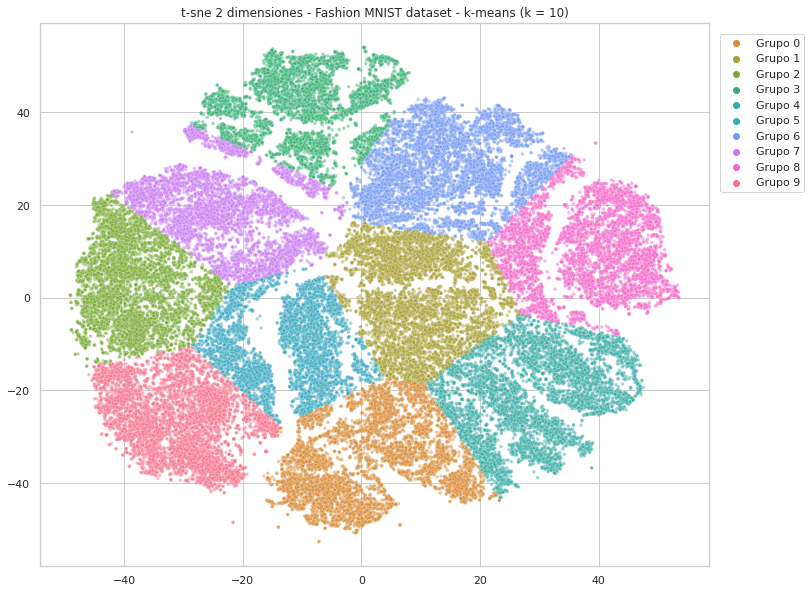

In [ ]:
sns.scatterplot(x = TSNE_model.embedding_[:,0], y = TSNE_model.embedding_[:,1], hue = hue_kmeans, s = 12, alpha = 0.5, legend = "full", hue_order=sorted(hue_kmeans))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1.)
plt.title("t-sne 2 dimensiones - Fashion MNIST dataset - k-means (k = 10)")
plt.show()

Para esta implementación se decide utilizar K=10, intentando simular la misma cantidad de categorías del dataset real. Se observa que existe relación entre los K clusters formados y los grupos formados por t-SNE de las categorias reales. Se obtiene que los grupos generados por K-meansse encuentran mayormente delimitados que aquellos generados por el embedding.

## Conclusiones

- La implementación de PCA por medio de SVD es computacionalmente menos costosa, ya que se obtuvo los componentes principales de manera óptima, a pesar de que al normalizar el datase se contaba con 70,000 registros.
- Se obtuvo que la implementación de t-SNE empleando sklearn es computacionalmente mas costosa para grandes cantidades de datos. Se obtuvo que para completar el metodo de fit_transform se necesito de aproximadamente 2 horas. 
- Para la implementación de K-means con K=10, se obtuvo que los clusters generados tenian relación, en otras palabras, se asemejaban a los formados por las etiquetas reales. 
- Para la implementación de K-means en PCA, se obtuvo clusters estrictamente delimitados que no correspondian con las etiquetas del dataset real.
- Con la implementación de t-SNE se observo que el algoritmo al reducir dimensionalidades, los datos se agrupan de acuerdo a sus caracteristicas, para este caso se obtuvo que prendas que poseeian las mismas caracteristicas, como ankle boots, sneakers y sandals, se encontraban agrupadas en el mismo cluster. De igual forma con las otra prendas, como pullovers, coats y t-shirts.